### Setup

In [1]:
using Dragoon

ArgumentError: ArgumentError: Package Dragoon not found in current path.
- Run `import Pkg; Pkg.add("Dragoon")` to install the Dragoon package.

In [2]:
#number of discs in the booster
n = 20

#initial disc configuration
#findpeak tries to find an equidistant configuration with a peak at f
initdist = fill(findpeak(22.025e9,n),n)

#generate frequencies for calculation and for plotting
freqs = genFreqs(22.025e9,50e6; length=10) #optimize on these frequencies
freqsplot = genFreqs(22.025e9,150e6; length=1000)

#initialize physical properties of the booster
booster = Booster(dist2pos(initdist),n,1e-3,24.,0.1e-3,2,0.,0.,0.)
#=
Booster(
    pos,              disc positions
    ndisk,            disc number
    thickness,        disc thickness
    epsilon,          disc epsilon
    vmotor,           motor speed
    maxlength,        maximum allowed booster length (not implemented yet)
    timestamp,        booster operation time
    summedtraveltime, summed motor operation time
    codetimestamp     code runtime
)
=#

#initialize storage of measurements
hist = initHist(booster,10000,freqs,(getObjAna1d,[]))
#                           ^ length, should be at least n
;

Objective Value: -243.3, Timestamp: 0.0


In [ ]:
#=
how to use

neldermead(                     directly modifies booster.pos
    booster,                    
    hist,                       
    freqs,                      frequency range to optimize on
    α,                          reflection parameter, 1 recommended
    β,                          expansion parameter, 1+2/n recommended
    γ,                          contraction parameter, 0.75-1/2n recommended
    δ,                          shrink parameter, 1-1/n recommended
    (objective,[options]),      objective function
    (initsimplex,[options]),    constructs initial simplex
    (simplexobj,[options]),     sweeps all vertices for their objective value
    (unstuckinator,[options]);  tries to unstuck system from bad local minima (not yet implemented)
    ϵgrad=0,                    terminate if norm(gradient) falls below this value,
    maxiter=100,                maximum allowed iterations,
    showtrace=false,            wether to print progress,
    showevery=1,                only print every i iterations,
    unstuckisiter=true,         wether an unstucking iteration counts towards maxiter
                                    warning! can run endlessly if false
    tracecentroid=false,        wether to write the centroid to trace, increases operation time
    traceevery=1,               write only every ith iteration to trace
)

returns trace, access with
trace[iteration].x      simplex disc positions
                .obj    simplex objective values
                .x_     centroid disc position if traced
                .obj_   centroid objective value if traced
                .t      timestamp
                .T      summed travel time
=#

In [3]:
trace = nelderMead(booster,hist,freqs,
                    1.,1+2/n,0.75-1/2n,1-1/n,
                    (getObjAna1d,[]),
                    (initSimplexCoord,[1e-4]),
                    (getSimplexObj,[]),
                    (unstuckDont,[]);
                    maxiter=Int(1e3),
                    showtrace=true,
                    showevery=100,
                    unstuckisiter=true);

Iter: 100, timestamp: 2 minutes, 23 seconds
Iter finished. Objective value: -1417.108

Iter: 200, timestamp: 3 minutes, 29 seconds
Iter finished. Objective value: -4613.62

Iter: 300, timestamp: 4 minutes, 32 seconds
Iter finished. Objective value: -12760.172

Iter: 400, timestamp: 5 minutes, 11 seconds
Iter finished. Objective value: -13733.936

Iter: 500, timestamp: 5 minutes, 34 seconds
Iter finished. Objective value: -13867.682

Iter: 600, timestamp: 5 minutes, 44 seconds
Iter finished. Objective value: -14088.231

Iter: 700, timestamp: 5 minutes, 47 seconds
Iter finished. Objective value: -14135.984

Iter: 800, timestamp: 5 minutes, 49 seconds
Iter finished. Objective value: -14161.093

Iter: 900, timestamp: 5 minutes, 50 seconds
Iter finished. Objective value: -14186.297

Iter: 1000, timestamp: 5 minutes, 51 seconds
Iter finished. Objective value: -14211.565

Terminated. Max iterations reached.
Final objective value: -14211.565
Elapsed movement time:  5 minutes, 51 seconds
Summed

In [4]:
#obtain result, booster is now in optimized position
#pos2dist(booster.pos)     #in distance space
booster.pos               #in position space

20-element Vector{Float64}:
 0.0071104117354328965
 0.015515178080012373
 0.02361755347957437
 0.03178905016495553
 0.03991324064999641
 0.048174950743456825
 0.056452613907255374
 0.06468189274041375
 0.07295034336322337
 0.08115771999132358
 0.08933086614454841
 0.09757745861651922
 0.10579819744583897
 0.11407911100903867
 0.12228173993056626
 0.1305483332032982
 0.13865692815607195
 0.14683160045399876
 0.1548182784390491
 0.16293102979758506

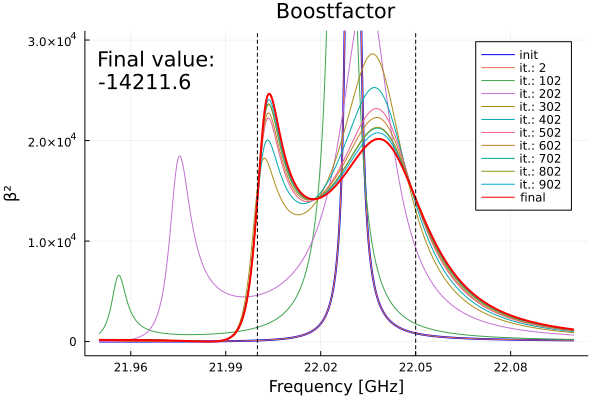

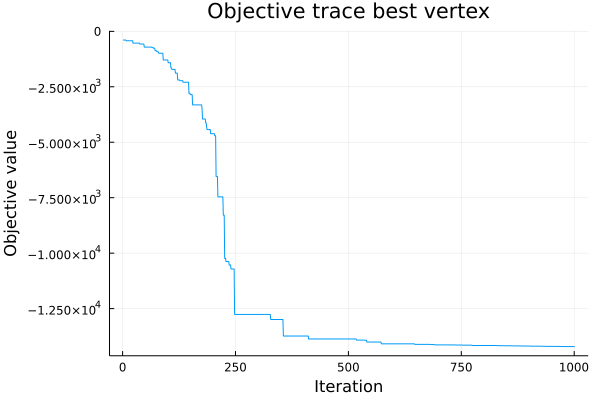

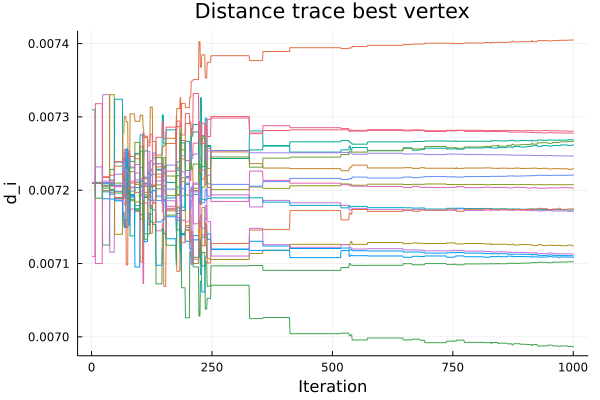

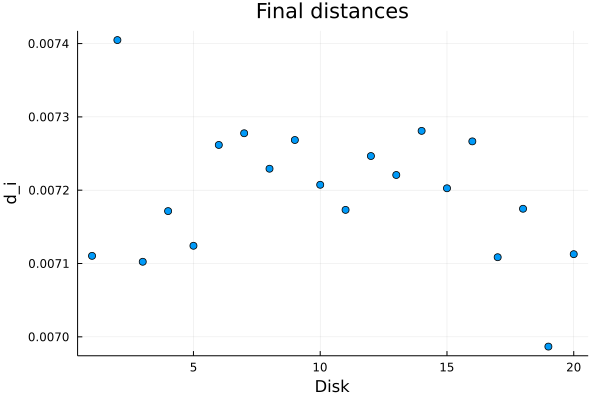

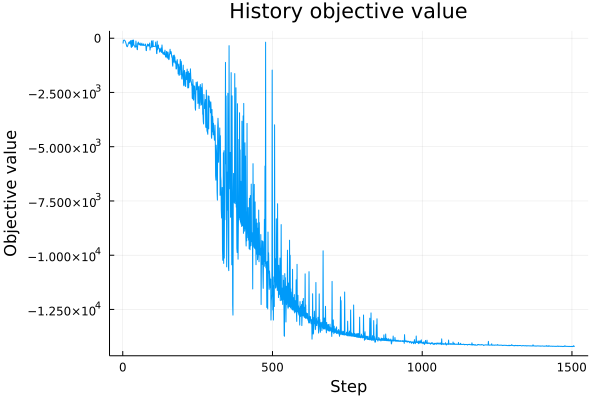

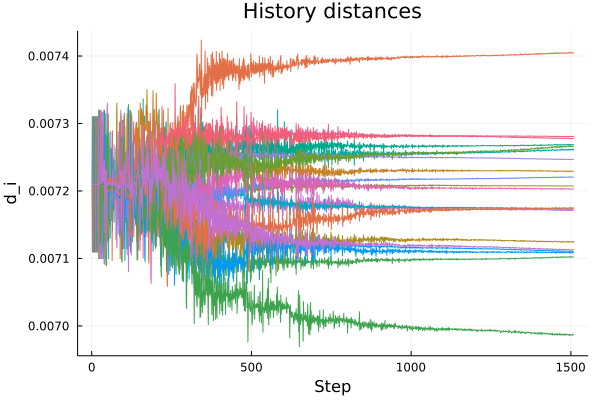

(Plot{Plots.GRBackend() n=13}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=1}, Plot{Plots.GRBackend() n=20})

In [5]:
#get handy output
plt = analyse(hist,trace,freqsplot; freqs=freqs,div=10)

#savefig(plt[i],"cool_epic_result_wow.svg")